<a href="https://colab.research.google.com/github/Ananya-AJ/CMPE255-Data-Mining/blob/main/FrequentPatternMining/frequentpatternmining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

frequent pattern mining apriori technique

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d heeraldedhia/groceries-dataset

  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 89.2MB/s]


In [ ]:
!unzip groceries-dataset.zip

Archive:  groceries-dataset.zip
  inflating: Groceries_dataset.csv   


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx


In [ ]:
data = pd.read_csv("Groceries_dataset.csv")
display(data.head())

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
data.head()

0    [sausage, whole milk, semi-finished bread, yog...
1                    [whole milk, pastry, salty snack]
2                       [canned beer, misc. beverages]
3                          [sausage, hygiene articles]
4                           [soda, pickled vegetables]
Name: itemDescription, dtype: object

Group them into transactions

In [ ]:
data.itemDescription = data.itemDescription.transform(lambda x: [x])
data = data.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)

encode the groups using transaction encoder

In [ ]:
encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(data).transform(data), columns=encoder.columns_)
display(transactions.head())

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The Apriori Algorithm will be used to generate frequent item sets.minimum support = 6 and association rules are filtered for lift >1.5 

In [ ]:
frequent_itemsets = apriori(transactions, min_support= 6/len(data), use_colnames=True, max_len = 2)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
display(rules.head())
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289
1,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854
2,(UHT-milk),(cream cheese ),0.021386,0.023658,0.000869,0.040625,1.717152,0.000363,1.017685
3,(cream cheese ),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922
4,(soda),(artif. sweetener),0.097106,0.001938,0.000468,0.004818,2.485725,0.000280,1.002893


Rules identified:  190


3d scatter plot to visualize association rules

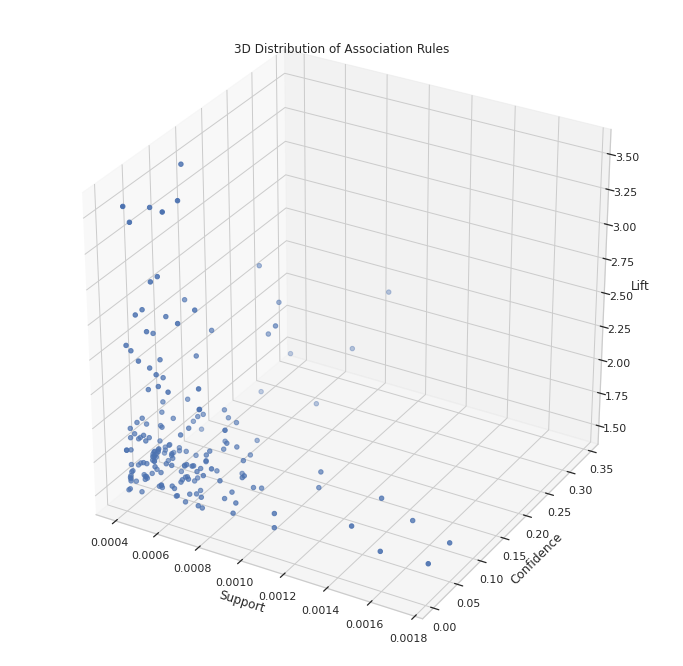

In [ ]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

In [ ]:
fpgrowth technique

In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.8 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
min_support = 7/len(transactions) 

# compute the frequent itemsets using fpgriowth from mlxtend
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
frequent_itemsets = fpgrowth(transactions, min_support=min_support, use_colnames = True)

# print the frequent itemsets
frequent_itemsets

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.009490,(semi-finished bread)
4,0.051728,(pastry)
...,...,...
1673,0.000468,"(bottled water, frozen dessert)"
1674,0.000468,"(other vegetables, frozen dessert)"
1675,0.000468,"(yogurt, frozen dessert)"
1676,0.000601,"(soda, frozen dessert)"


In [ ]:
from mlxtend.frequent_patterns import association_rules

# compute and print the association rules
association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
1,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
2,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
3,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596
4,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532
...,...,...,...,...,...,...,...,...,...
283,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957
284,(whole milk),(light bulbs),0.157923,0.001938,0.000468,0.002962,1.528463,0.000162,1.001027
285,(light bulbs),(whole milk),0.001938,0.157923,0.000468,0.241379,1.528463,0.000162,1.110011
286,(canned beer),(frozen dessert),0.046916,0.006148,0.000468,0.009972,1.621779,0.000179,1.003862
